<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

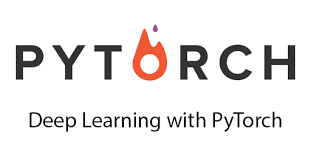

In [0]:
import torch
import torch.nn as nn  ## 신경망 모듈
import torch.nn.functional as F  ## 신경망 함수모음

In [4]:
torch.manual_seed(1)  ## 랜덤 고정 

In [0]:
# 데이터 (텐서형태로 되어여 함)
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [0]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)    ## 선형 신경망 모듈

In [0]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)   ## 옵티마이저=SGD

In [12]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
EPOCH = 2000   ## 학습횟수
for epoch in range(EPOCH+1):

    # f(x)=wx+b 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)  # <== 평균 제곱 오차 함수

    # cost로 f(x)를 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward propagation 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 0.000000
Epoch  100/2000 Cost: 0.000000
Epoch  200/2000 Cost: 0.000000
Epoch  300/2000 Cost: 0.000000
Epoch  400/2000 Cost: 0.000000
Epoch  500/2000 Cost: 0.000000
Epoch  600/2000 Cost: 0.000000
Epoch  700/2000 Cost: 0.000000
Epoch  800/2000 Cost: 0.000000
Epoch  900/2000 Cost: 0.000000
Epoch 1000/2000 Cost: 0.000000
Epoch 1100/2000 Cost: 0.000000
Epoch 1200/2000 Cost: 0.000000
Epoch 1300/2000 Cost: 0.000000
Epoch 1400/2000 Cost: 0.000000
Epoch 1500/2000 Cost: 0.000000
Epoch 1600/2000 Cost: 0.000000
Epoch 1700/2000 Cost: 0.000000
Epoch 1800/2000 Cost: 0.000000
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [13]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[8.0000]], grad_fn=<AddmmBackward>)


In [14]:
print(list(model.parameters()))

[Parameter containing:
tensor([[2.0000]], requires_grad=True), Parameter containing:
tensor([1.5649e-05], requires_grad=True)]
